## Text, Image and Table extraction from Json files 


Instructions: 
<br> <br>
To run this code successfully, we will need to download the folders "data" and "images" respectively from the Onedrive on Teams. 
- Firstly, ensure that you keep this python notebook in your "data" folder. Secondly, "images" folder should be in the same directory as that of the "data" folder. 
- The first module returns all the images and tables with their respective captions which can be used to study the key-words
- The second module will be used to extract images and table with respect to the keywords and then train our model. 

In [1]:
#import all the required packages 
from collections import Counter
from pathlib import Path
from PIL import Image
from tqdm import tqdm

import cv2, json, os, re
import glob, PyPDF2, shutil#, textract
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data_dir = '../data'
img_dir = '../images'

### Module 1 :  Figures with Captions

In [3]:
for path in Path(data_dir).iterdir():
    if path.name.endswith('.json'):
        with path.open(encoding = "utf-8") as json_file:
            json_data = json.load(json_file)
                
            for i in range(len(json_data)):
                res = [json_data[i]['renderURL'][6:] , json_data[i]['caption']]
                
                if res[0] in os.listdir(img_dir):
                    img = Image.open(img_dir + '/' + res[0])
                    plt.figure(dpi = 200)
                    plt.title(res[1])
                    plt.imshow(img, aspect='auto')
                    plt.show()

KeyError: 0

### Module 2 : Image/Table selection by using keywords

### Case 1

Any of these keywords ‘Bio-oil’, ‘oil’, ‘light fraction’, ‘heavy fraction’, ‘light oil’, ‘heavy oil’, ‘bio oil’, ‘biooil’, ‘bio-oils’, ‘biomass’, ‘biocrude’, ‘bio-crude’, ‘crude’, ‘product’ accompanied by ‘yield’, ‘carbon’, ‘recovery’, ‘CR’, ’production’, ‘distribution’, ‘product’.

Pass case: IF (Keyword set A && Keyword set B) == True

In [ ]:
image_data = []
table_data = []

keywordsA = ["bio-oil", "oil", "lightfraction", "heavyfraction", "lightoil", "heavyoil", "biooil",
             "biomass", "biocrude", "bio-crude", "product"]
keywordsB = ["yeild", "yields", "carbon", "recovery", "CR", "production", "distribution", "product"]

# Make the keywords boundary-words
patternA = re.compile('|'.join([r'\b' + word + r'\b' for word in keywordsA]))
patternB = re.compile('|'.join([r'\b' + word + r'\b' for word in keywordsB]))

for path in Path(data_dir).iterdir():
    if path.name.endswith('.json'):
        with path.open(encoding = "utf-8") as json_file:
            json_data = json.load(json_file)
                
            for data in json_data:
                if data['figType'] == "Figure":
                    if bool(patternA.findall(data['caption'])) and bool(patternB.findall(data['caption'])):
                        image_data.append(data['renderURL'][6:])
                        
                if data['figType'] == "Table":
                    if bool(patternA.findall(data['caption'])) and bool(patternB.findall(data['caption'])):
                        table_data.append(data['renderURL'][6:])
                
# Remove duplicates from the data
image_data = set(image_data)
table_data = set(table_data)


print(set(image_data))
# Copy all the images to Case1/images
if not os.path.exists('Case1/images'):
    os.makedirs('Case1/images')

for image in image_data:
    shutil.copyfile(img_dir + '/' + image, 'Case1/images' + '/' + image)
    
# Copy all the tables to Case1/tables
if not os.path.exists('Case1/tables'):
    os.makedirs('Case1/tables')
    
for table in table_data:
    shutil.copyfile(img_dir + '/' + table, 'Case1/tables' + '/' + table)

{'1-s2.0-S2211926414000691-main-Figure1-1.png', '1-s2.0-S2211926417305477-main-Figure6-1.png', '1-s2.0-S0960148119316866-main-Figure4-1.png', '1-s2.0-S0016236119323397-main-Figure1-1.png', 'ep.12172-Figure5-1.png', 'ef502773w-Figure8-1.png', '1-s2.0-S0016236118304502-main-Figure4-1.png', 'acs.est.8b04035-Figure6-1.png', '1-s2.0-S0960852414010724-main-Figure3-1.png', '1-s2.0-S0960852412000144-main-Figure2-1.png', '1-s2.0-S0960852417322113-main-Figure5-1.png', '1-s2.0-S2211926414000691-main-Figure5-1.png', '1-s2.0-S0960852414010724-main-Figure4-1.png', '1-s2.0-S0960852417320539-main-Figure2-1.png', '1-s2.0-S096085241100099X-main-Figure1-1.png', '1-s2.0-S2211926414000691-main-Figure2-1.png', '1-s2.0-S0960852413019238-main-Figure2-1.png', '1-s2.0-S1385894716310506-main-Figure6-1.png', '1-s2.0-S0960852416306198-main-Figure2-1.png', 'acssuschemeng.7b00233-Figure2-1.png', '1-s2.0-S1385894716310506-main-Figure5-1.png', 'acs.est.8b04035-Figure5-1.png', '1-s2.0-S2211926415300345-main-Figure6-1.p

### Case 2

If the keywords ‘yield’, ‘carbon’, ‘recovery’, ‘CR’, ’production’, ‘product’ are present but other keywords such as ‘solid’, ‘gas’, ‘aqueous’, ‘glucose’, ‘gaseous’, ‘solids’ are absent and the word next to bio-oil is not ‘of’

Pass case: IF ‘yield’, ‘carbon recovery’, ‘recoveries’ == True && ‘Keyword set A’ == False && wordn+1 == ‘of’ is false

In [ ]:
image_data = []
table_data = []

keywordsA = ["solid", "gas", "aqueous", "glucose", "gaseous", "solids", "bio-oil of"]
keywordsB = ["yeild", "yields", "carbon", "recovery", "CR", "production", "distribution", "product"]

# Make the keywords boundary-words
patternA = re.compile('|'.join([r'\b' + word + r'\b' for word in keywordsA]))
patternB = re.compile('|'.join([r'\b' + word + r'\b' for word in keywordsB]))

for path in Path(data_dir).iterdir():
    if path.name.endswith('.json'):
        with path.open(encoding = "utf-8") as json_file:
            json_data = json.load(json_file)
                
            for data in json_data:
                if data['figType'] == "Figure":
                    if not bool(patternA.findall(data['caption'])) and bool(patternB.findall(data['caption'])):
                        image_data.append(data['renderURL'][6:])
                        
                if data['figType'] == "Table":
                    if not bool(patternA.findall(data['caption'])) and bool(patternB.findall(data['caption'])):
                        table_data.append(data['renderURL'][6:])

# Remove duplicates from the data
image_data = set(image_data)
table_data = set(table_data)

# Create directory 'Case2/images' and copy the selected images
if not os.path.exists('Case2/images'):
    os.makedirs('Case2/images')

for image in image_data:
    shutil.copyfile(img_dir + '/' + image, 'Case2/images' + '/' + image)

# Create directory 'Case2/tables' and copy the selected tables
if not os.path.exists('Case2/tables'):
    os.makedirs('Case2/tables')
    
for table in table_data:
    shutil.copyfile(img_dir + '/' + table, 'Case2/tables' + '/' + table)

### Case 3

Test for presence of ‘a)’,’b)’, ‘c)’ before checking for plot check

Pass case: if ‘Keyword set A’ == true, don’t do plot check 

In [ ]:
image_data = []
table_data = []
total_images = []
total_tables = []

keywordsA = ['a\)', 'b\)', 'c\)']

# Make the keywords boundary-words
patternA = re.compile('|'.join([word for word in keywordsA]))

for path in Path(data_dir).iterdir():
    if path.name.endswith('.json'):
        with path.open(encoding = "utf-8") as json_file:
            json_data = json.load(json_file)
                
            for data in json_data:
                if data['figType'] == "Figure":
                    if bool(patternA.findall(data['caption'])):
                        image_data.append(data['renderURL'][6:])
                        
                if data['figType'] == "Table":
                    if bool(patternA.findall(data['caption'])):
                        table_data.append(data['renderURL'][6:])

# Remove duplicates from the data
image_data = set(image_data)
table_data = set(table_data)

# Create directory 'Case3/images' and copy the selected images
if not os.path.exists('Case3/images'):
    os.makedirs('Case3/images')

for image in image_data:
    shutil.copyfile(img_dir + '/' + image, 'Case3/images' + '/' + image)
        
# Create directory 'Case3/tables' and copy the selected tables
if not os.path.exists('Case3/tables'):
    os.makedirs('Case3/tables')

for table in table_data:
    shutil.copyfile(img_dir + '/' + table, 'Case3/tables' + '/' + table)

### Case 4

‘GC/MS’, ‘‘GC-MS’, ‘GC MS’, ‘GCMS’, ‘ion chromatogram’, ‘gas chromatography’, ‘areas’, ‘chromatogram’, ‘peak’, ‘functional’, ’compounds’, ‘composition’ are present

Pass case: IF Keyword set A == True

In [ ]:
image_data = []
table_data = []

keywordsA = ["GC/MS", "GC-MS", "GC MS", "GCMS", "ion chromatogram", "gas chromatography",
             "areas", "chromatogram", "peak", "functional", "compounds", "composition"]

# Make the keywords boundary-words
patternA = re.compile('|'.join([r'\b' + word + r'\b' for word in keywordsA]))

for path in Path(data_dir).iterdir():
    if path.name.endswith('.json'):
        with path.open(encoding = "utf-8") as json_file:
            json_data = json.load(json_file)
                
            for data in json_data:
                if data['figType'] == "Figure":
                    if bool(patternA.findall(data['caption'])):
                        image_data.append(data['renderURL'][6:])
                        
                if data['figType'] == "Table":
                    if bool(patternA.findall(data['caption'])):
                        table_data.append(data['renderURL'][6:])

# Remove duplicates from the data
image_data = set(image_data)
table_data = set(table_data)

# Create directory 'Case4/images' and copy the selected images
if not os.path.exists('Case4/images'):
    os.makedirs('Case4/images')

for image in image_data:
    shutil.copyfile(img_dir + '/' + image, 'Case4/images' + '/' + image)
        
# Create directory 'Case4/tables' and copy the selected tables
if not os.path.exists('Case4/tables'):
    os.makedirs('Case4/tables')

for table in table_data:
    shutil.copyfile(img_dir + '/' + table, 'Case4/tables' + '/' + table)

### Case 5

‘Biochemical’, ‘proximate’, ‘ultimate’, ‘elemental’ are present

Pass case: IF Keyword set A == True

In [ ]:
image_data = []
table_data = []

keywordsA = ["Biochemical", "proximate", "ultimate", "elemental"]
    
# Make the keywords boundary-words
patternA = re.compile('|'.join([r'\b' + word + r'\b' for word in keywordsA]))

for path in Path(data_dir).iterdir():
    if path.name.endswith('.json'):
        with path.open(encoding = "utf-8") as json_file:
            json_data = json.load(json_file)
                
            for data in json_data:
                if data['figType'] == "Figure":
                    if bool(patternA.findall(data['caption'])):
                        image_data.append(data['renderURL'][6:])
                        
                if data['figType'] == "Table":
                    if bool(patternA.findall(data['caption'])):
                        table_data.append(data['renderURL'][6:])

# Remove duplicates from the data
image_data = set(image_data)
table_data = set(table_data)

# Create directory 'Case5/images' and copy the selected images
if not os.path.exists('Case5/images'):
    os.makedirs('Case5/images')

for image in image_data:
    shutil.copyfile(img_dir + '/' + image, 'Case5/images' + '/' + image)
        
# filtered is already created; so just create tables directory and copy all the selected tables
if not os.path.exists('Case5/tables'):
    os.makedirs('Case5/tables')

for table in table_data:
    shutil.copyfile(img_dir + '/' + table, 'Case5/tables' + '/' + table)

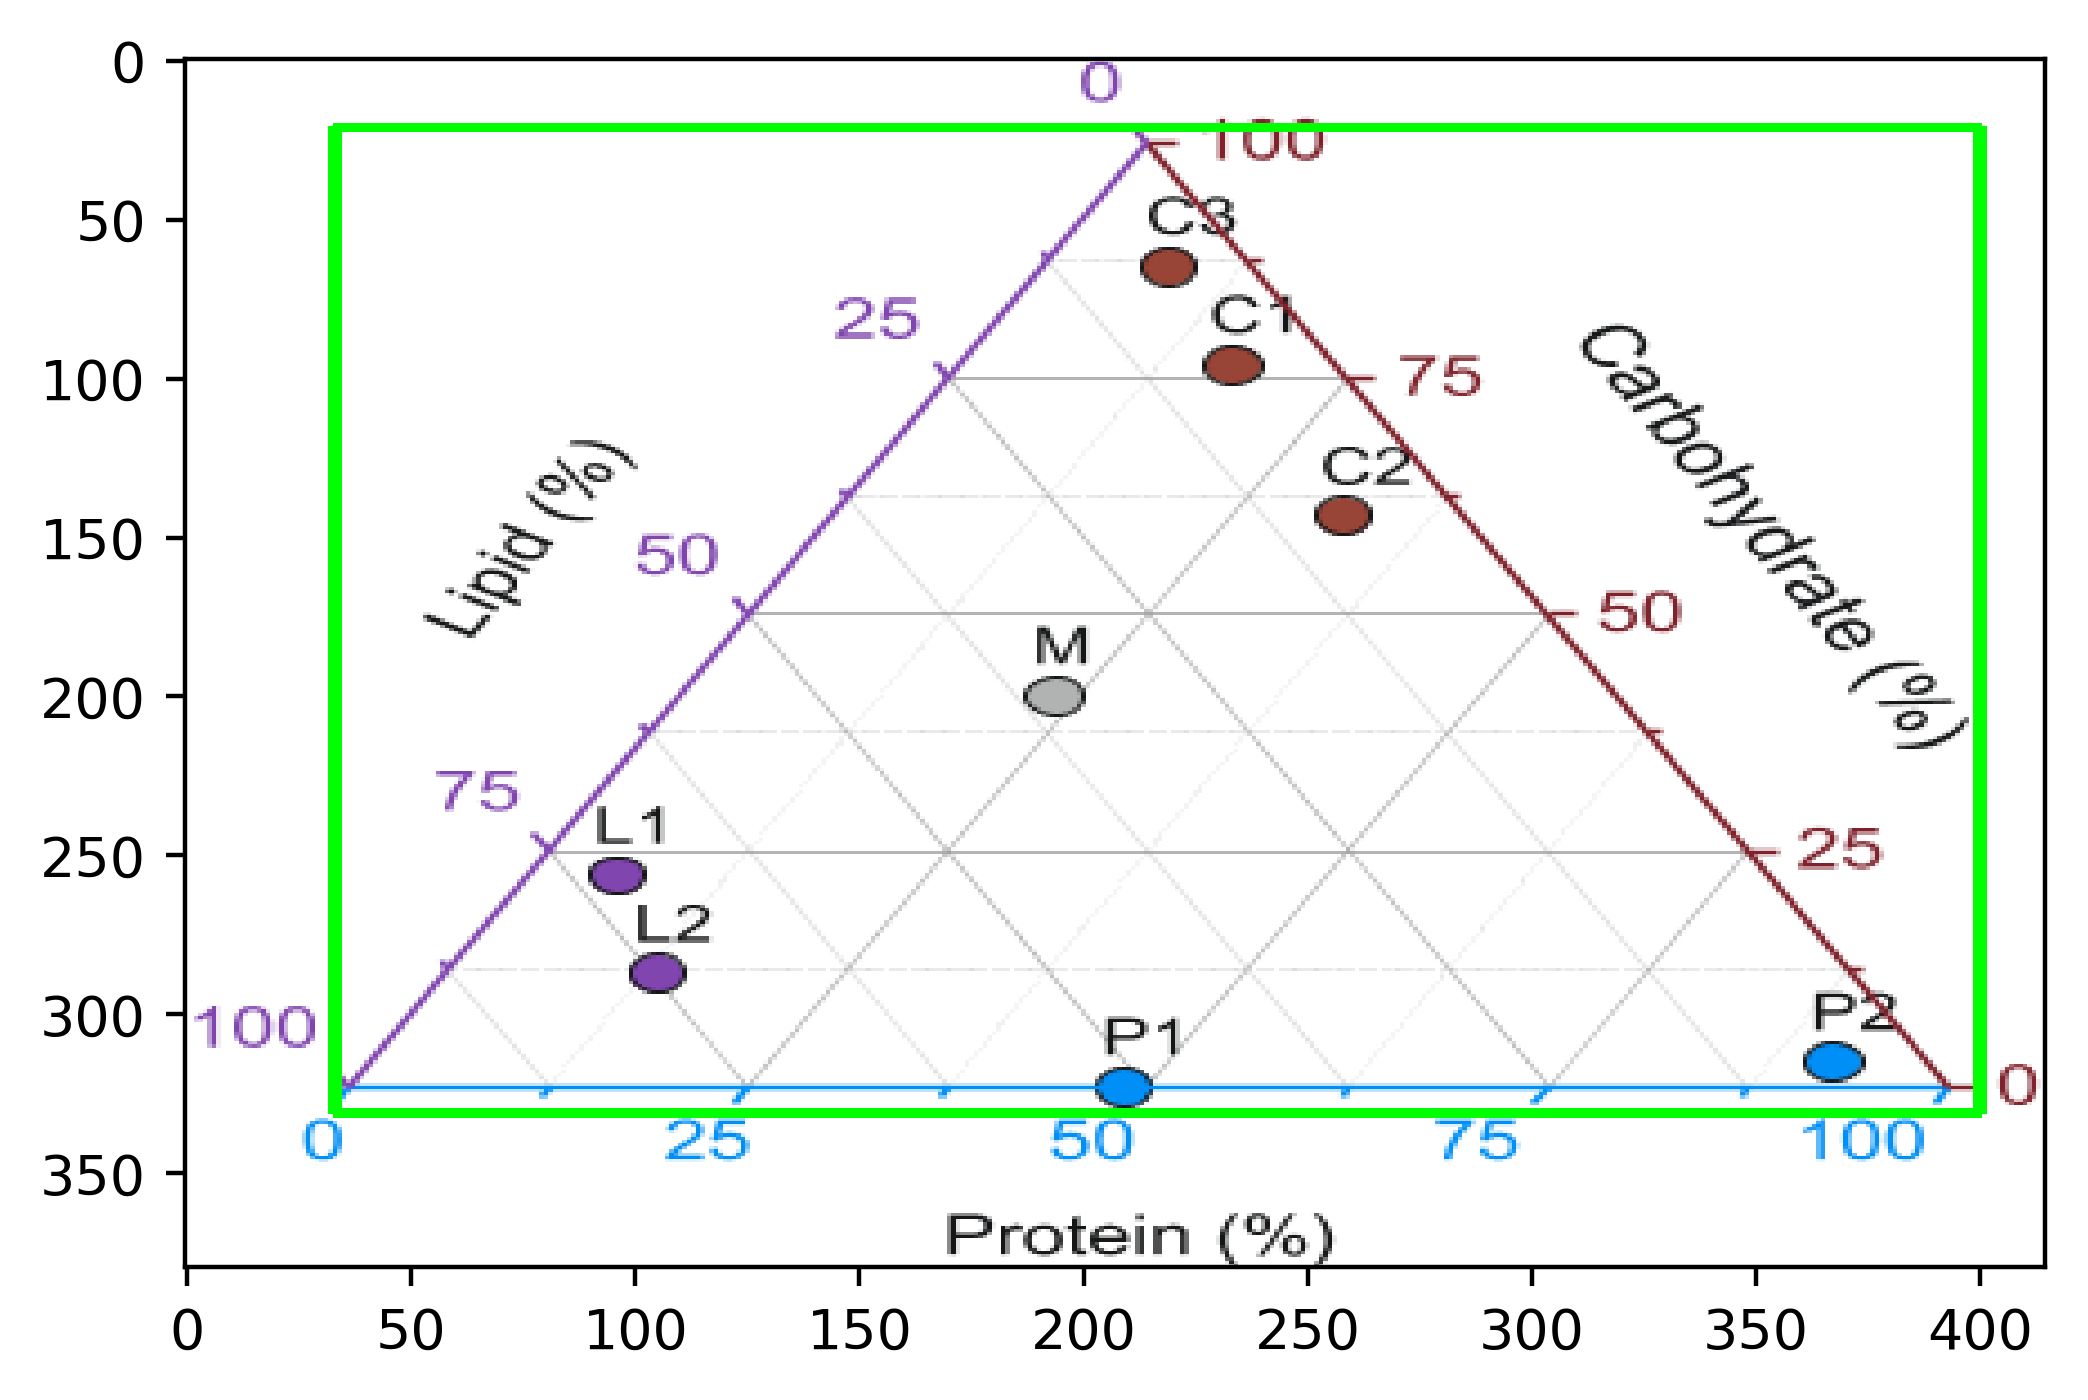

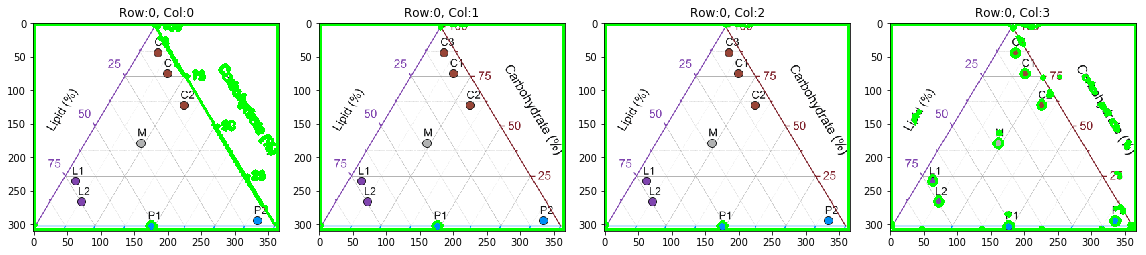

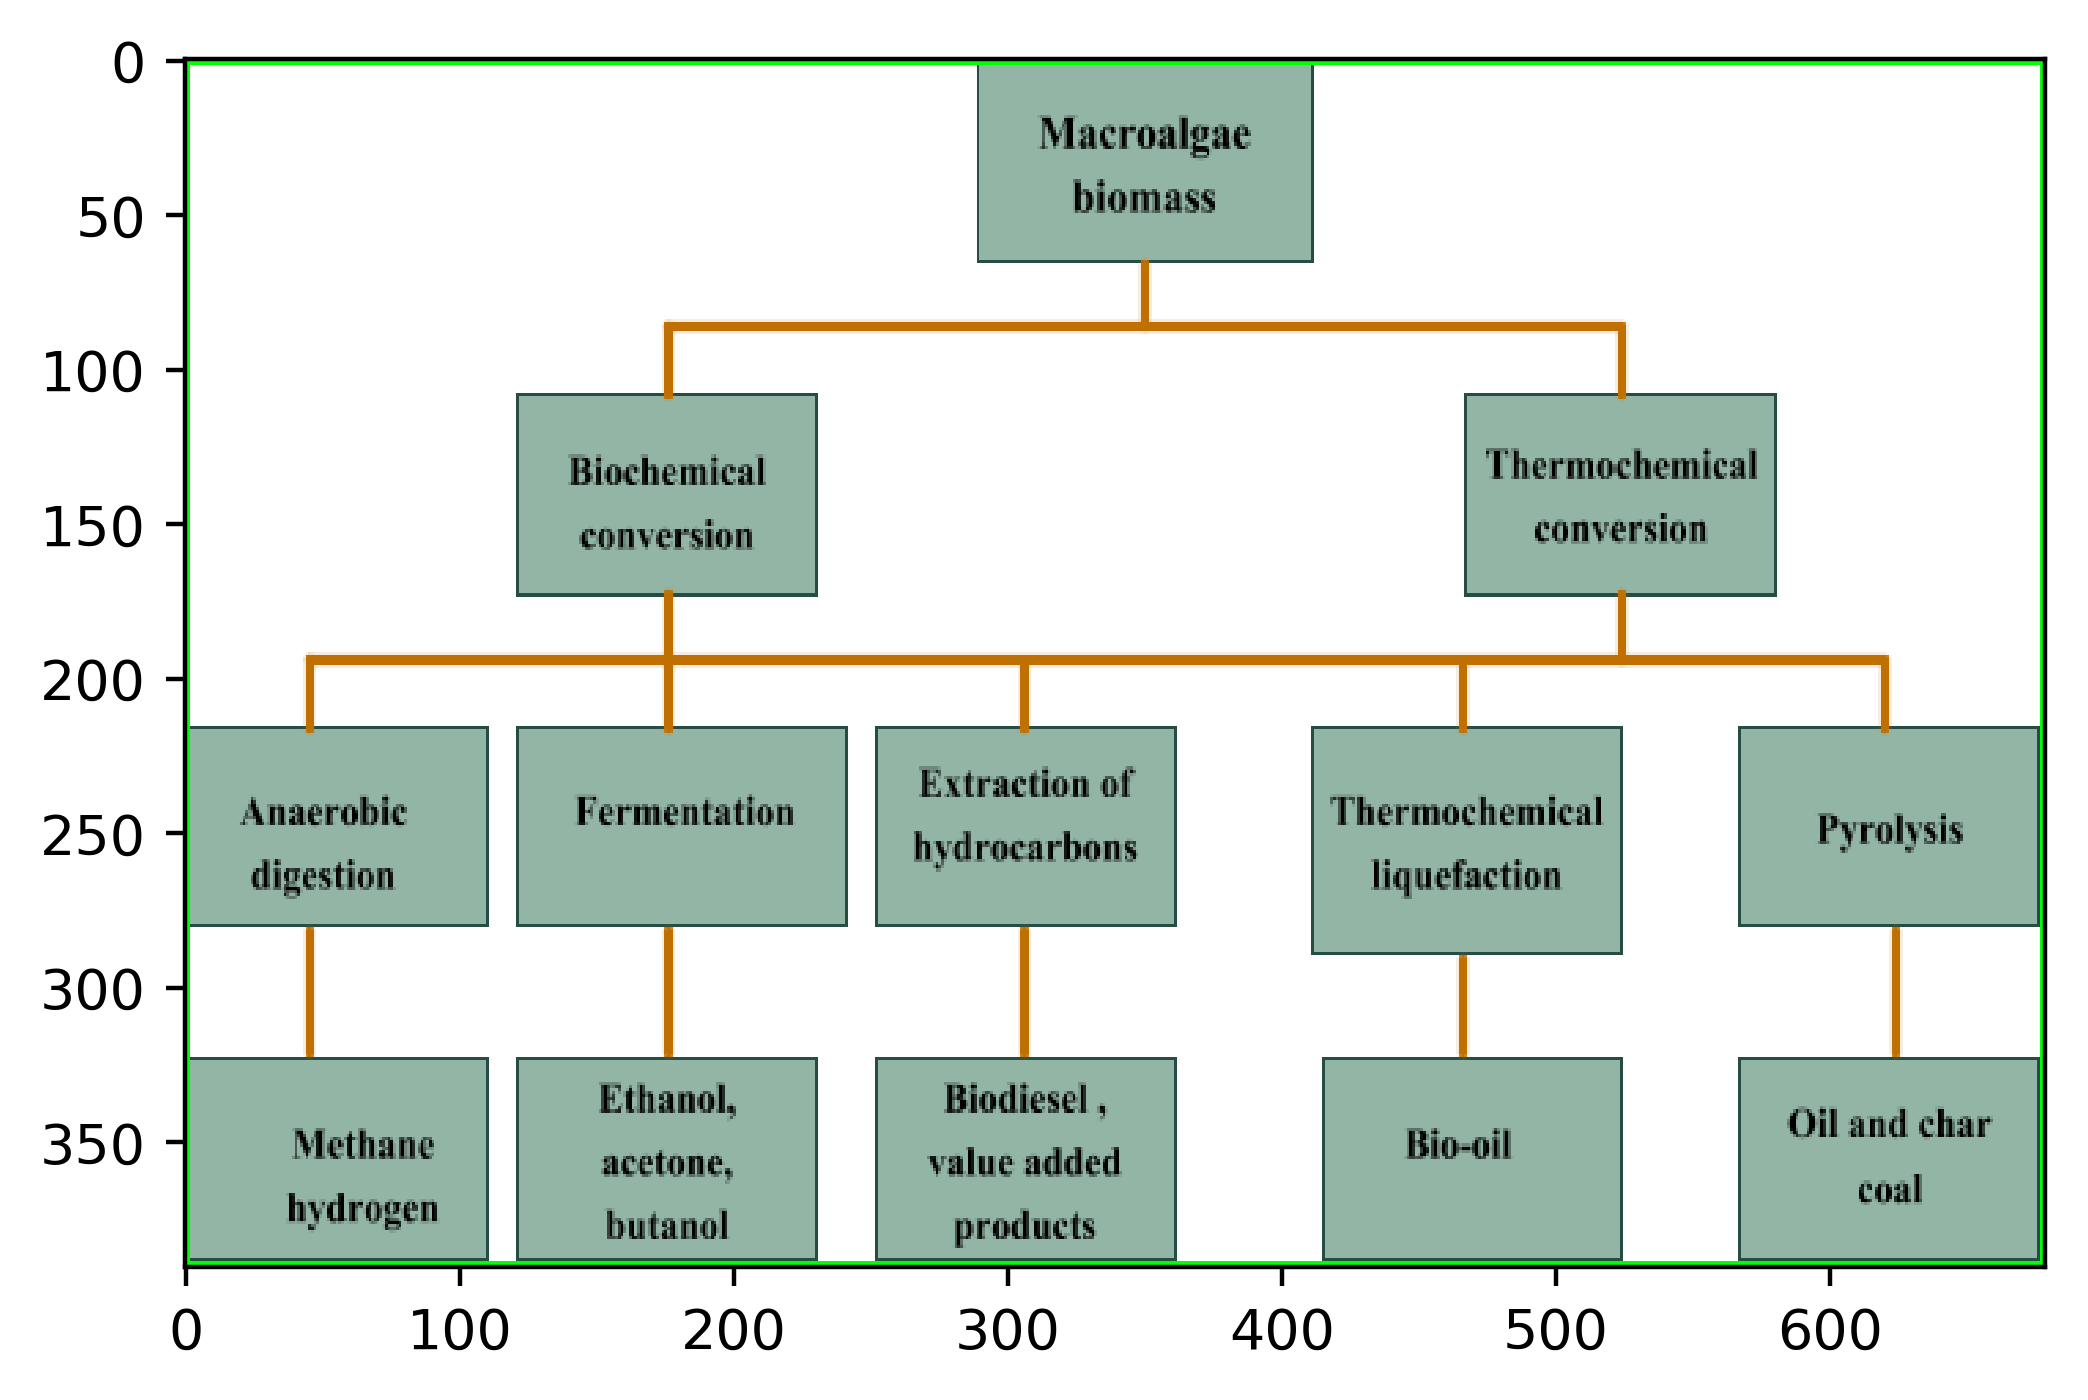

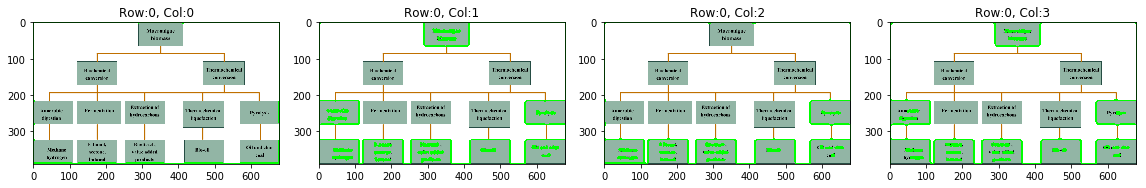

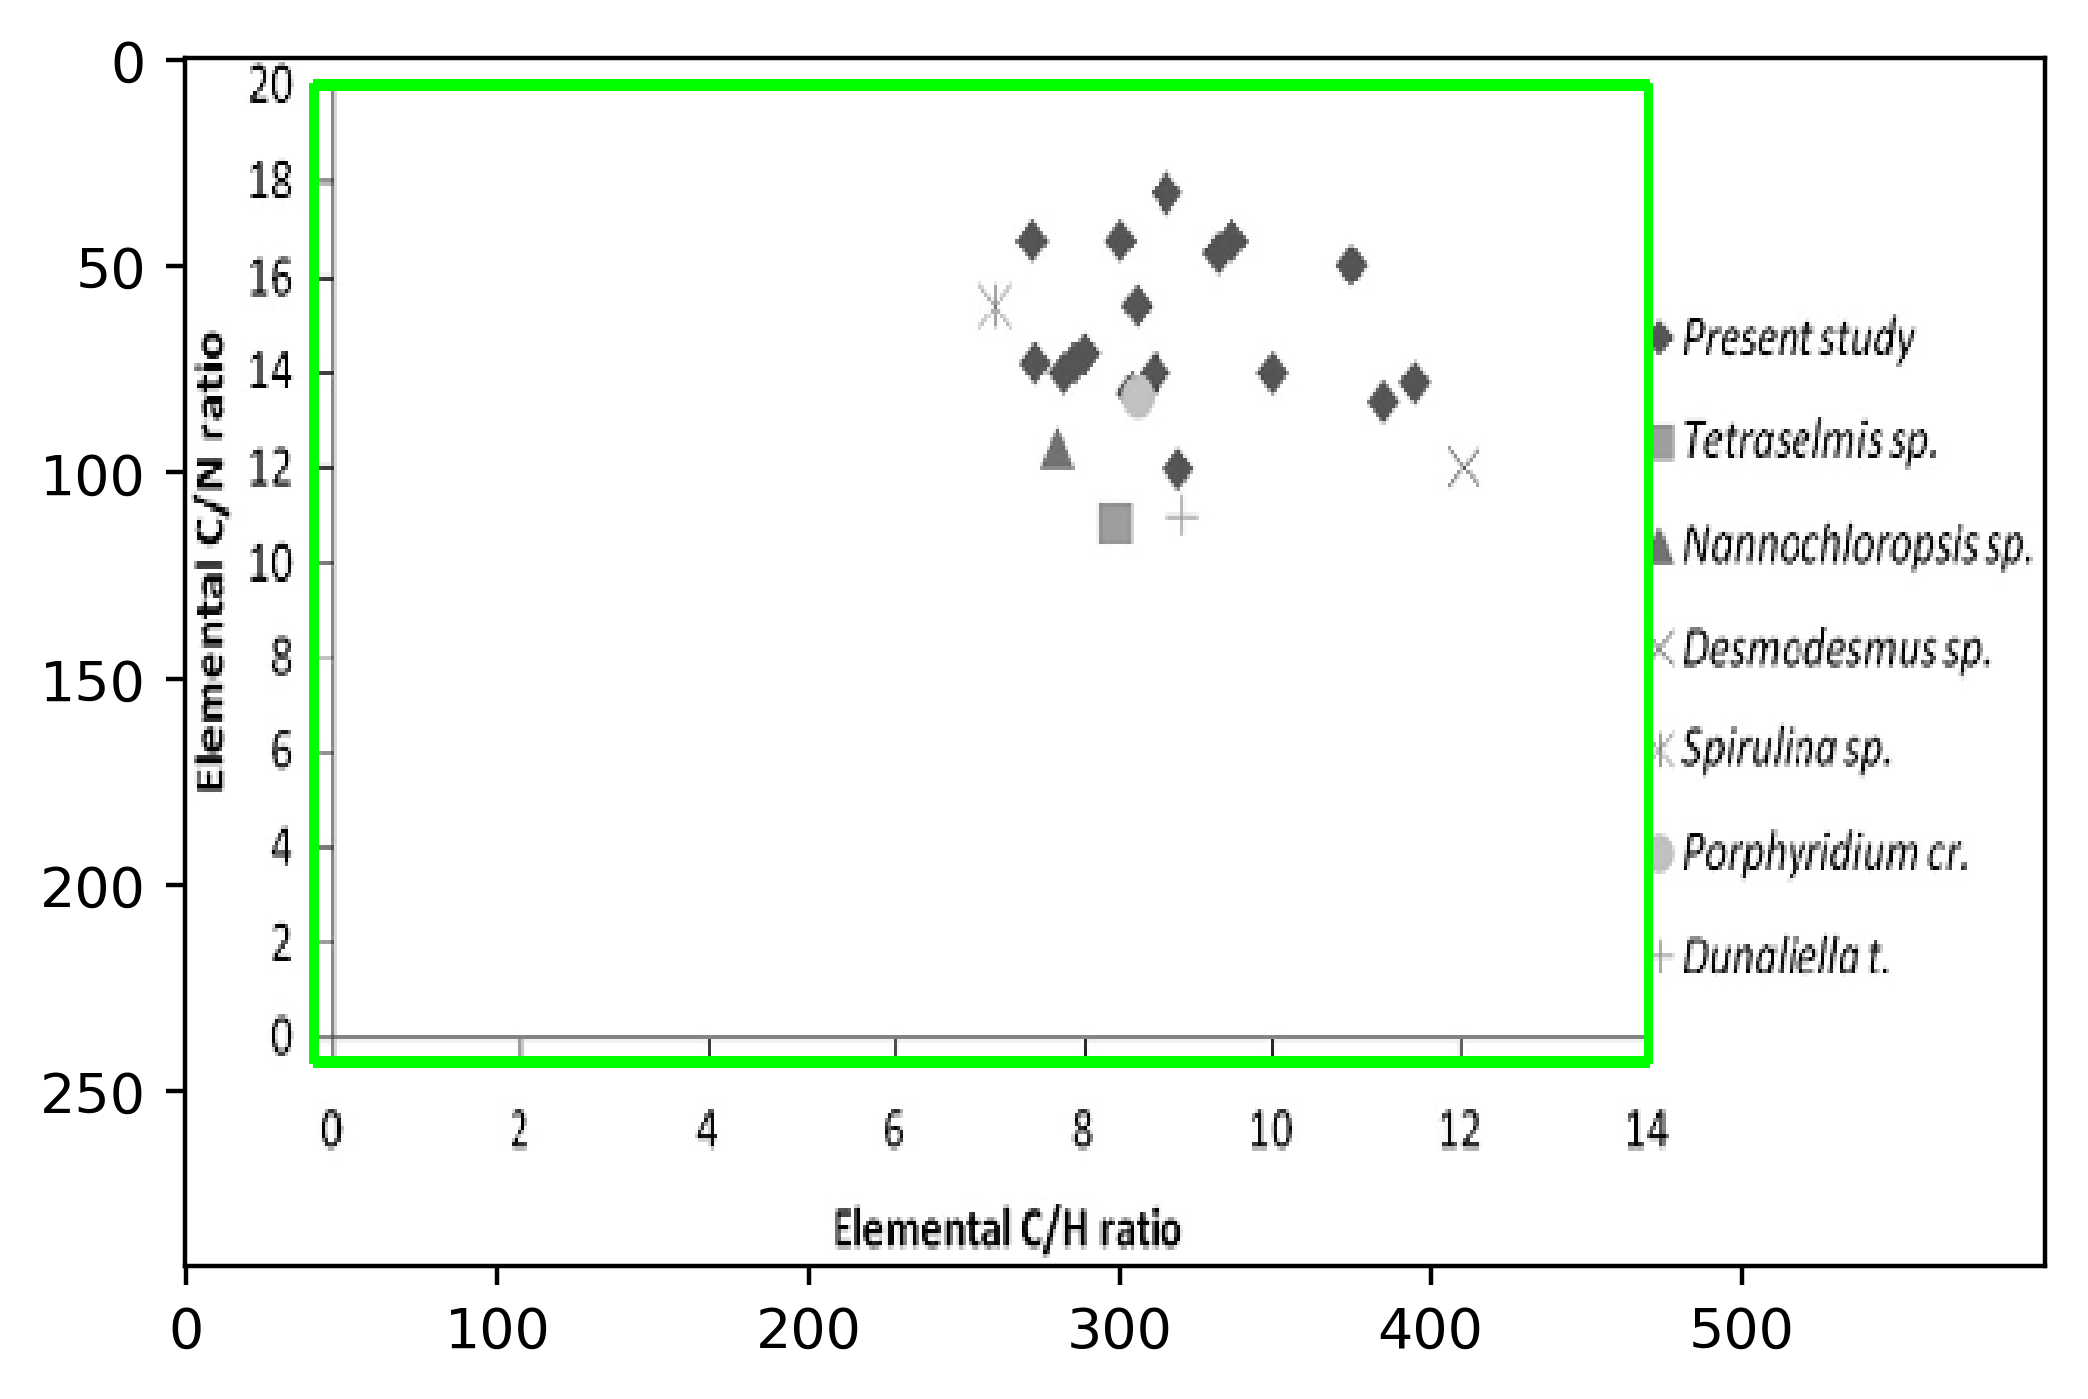

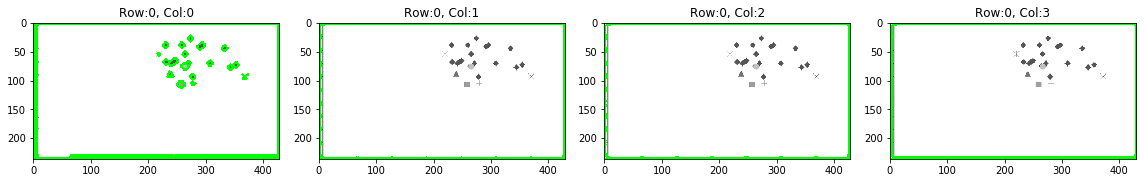

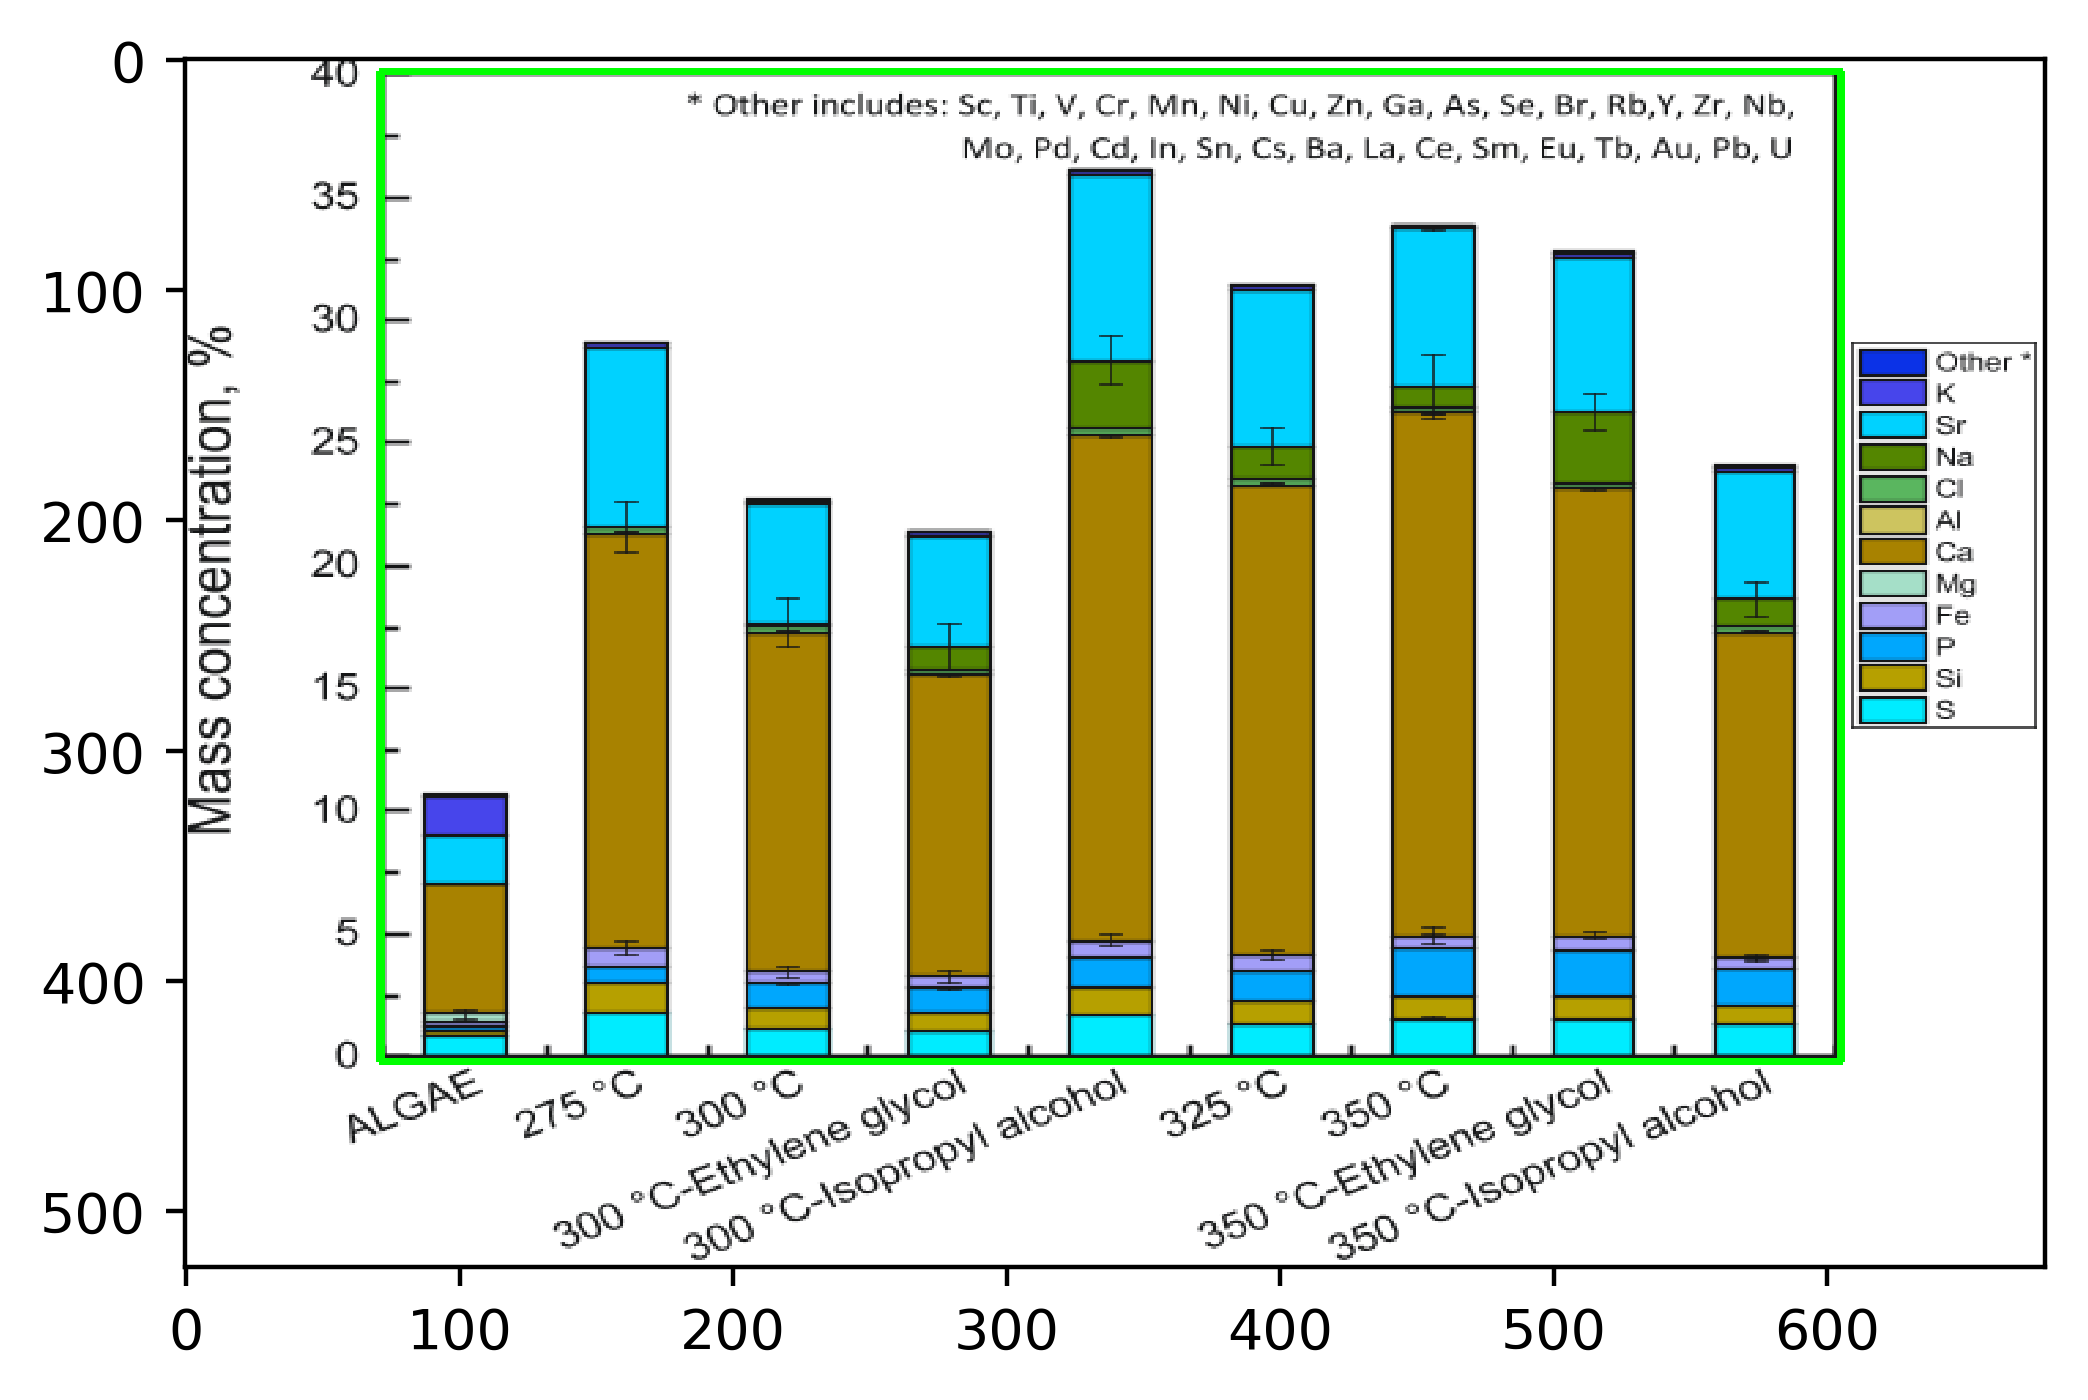

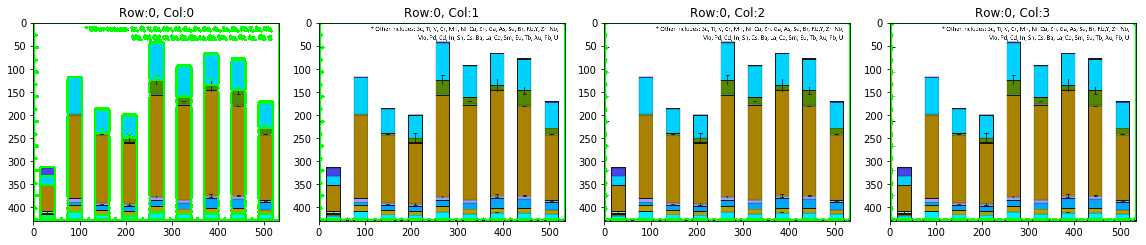

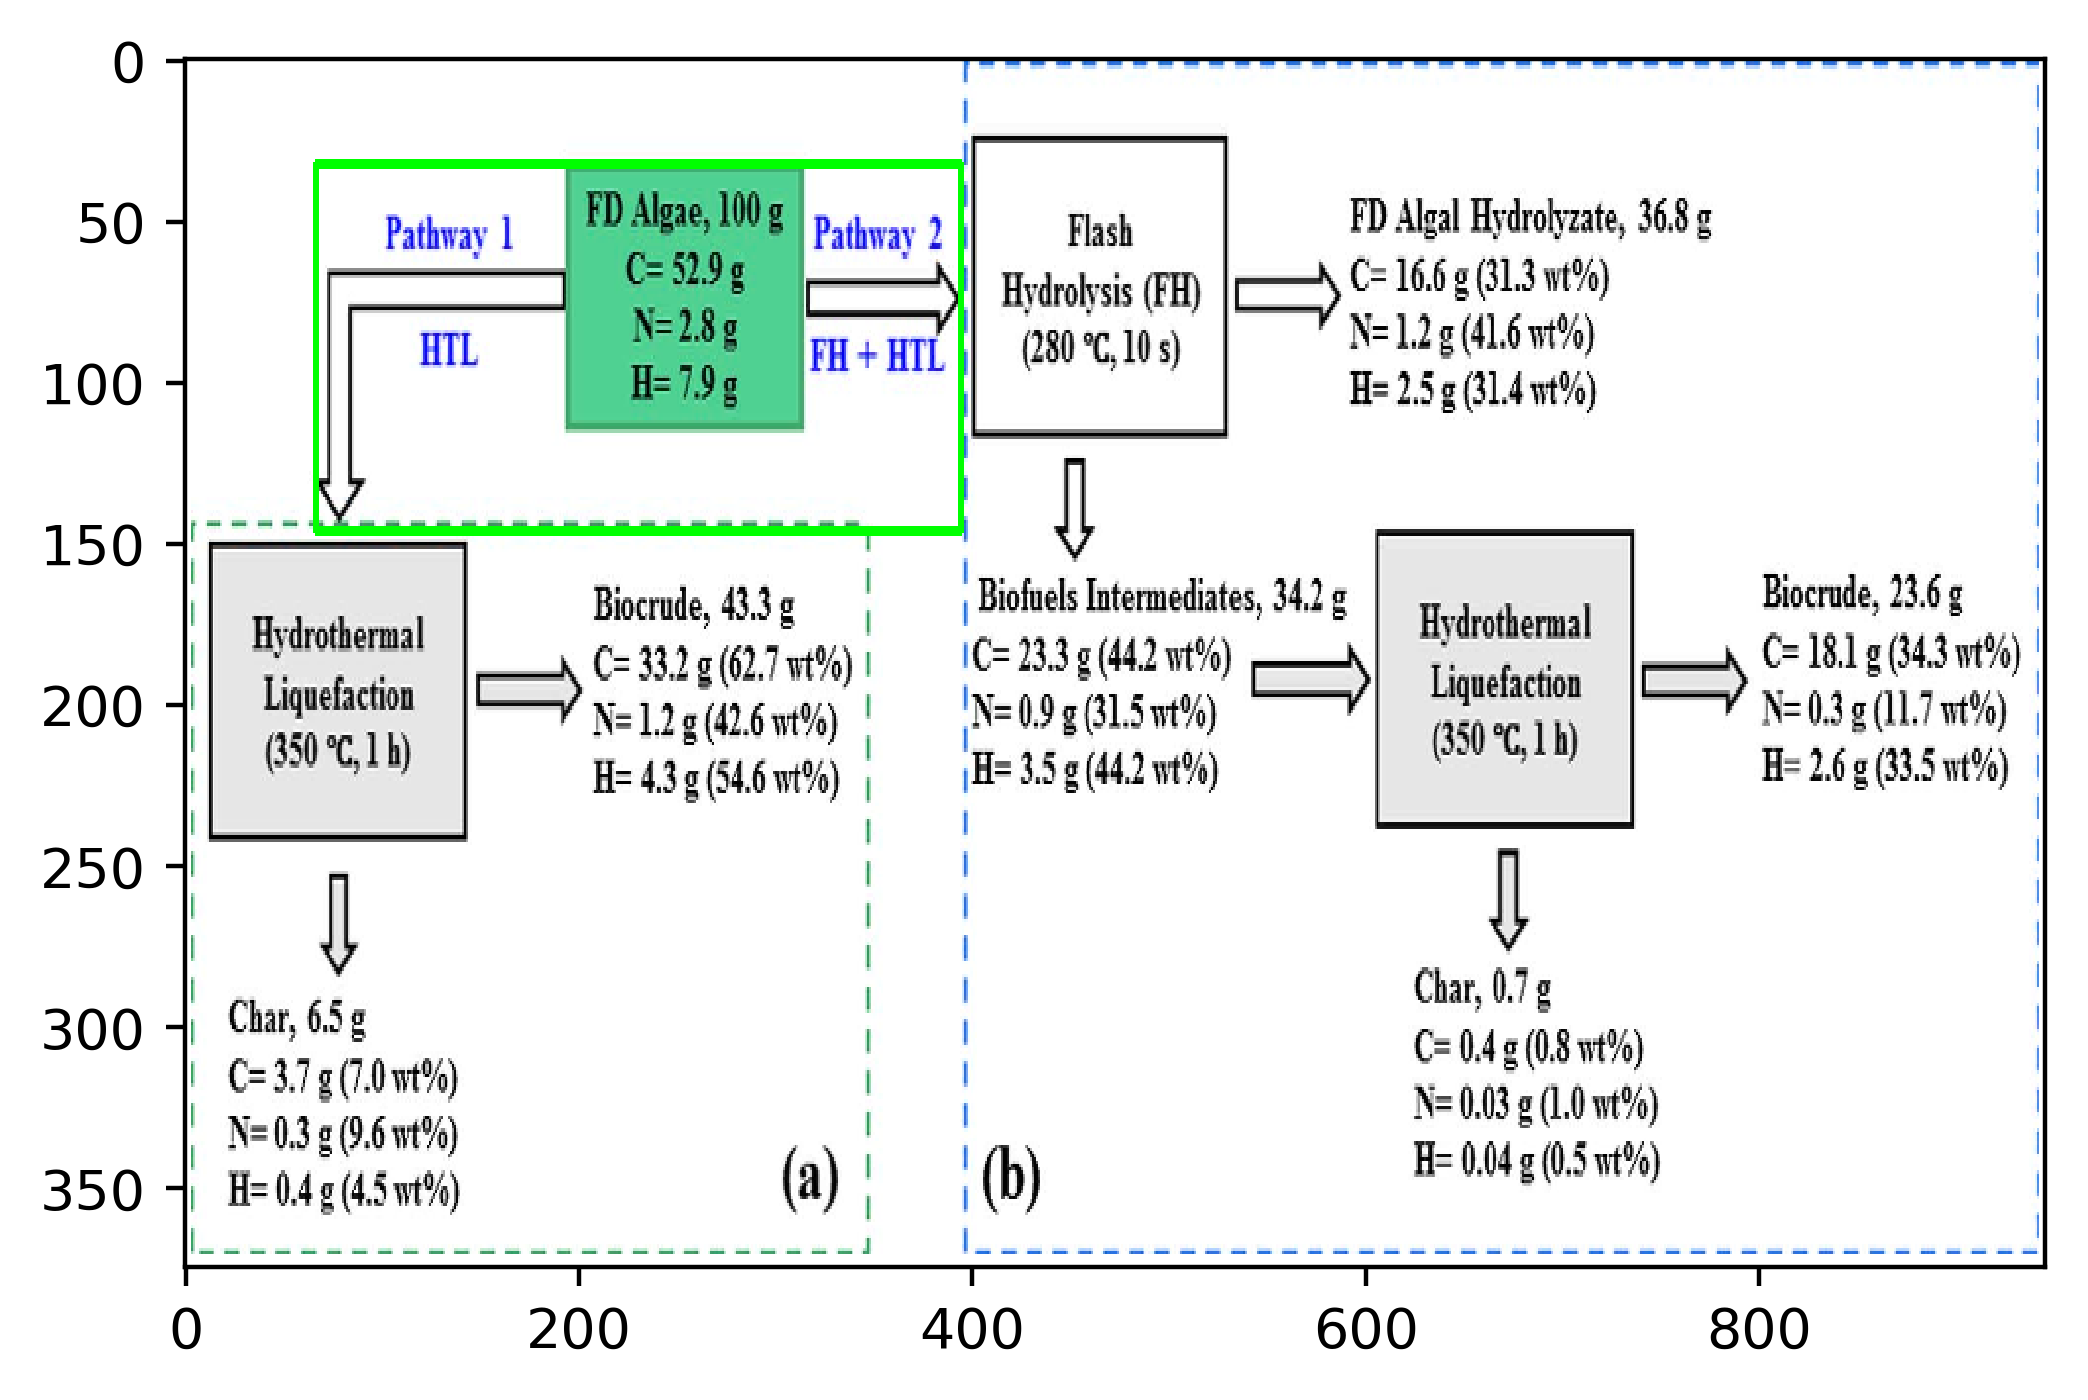

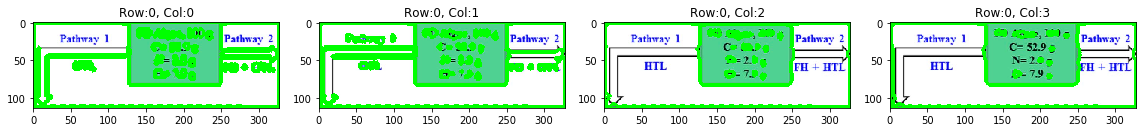

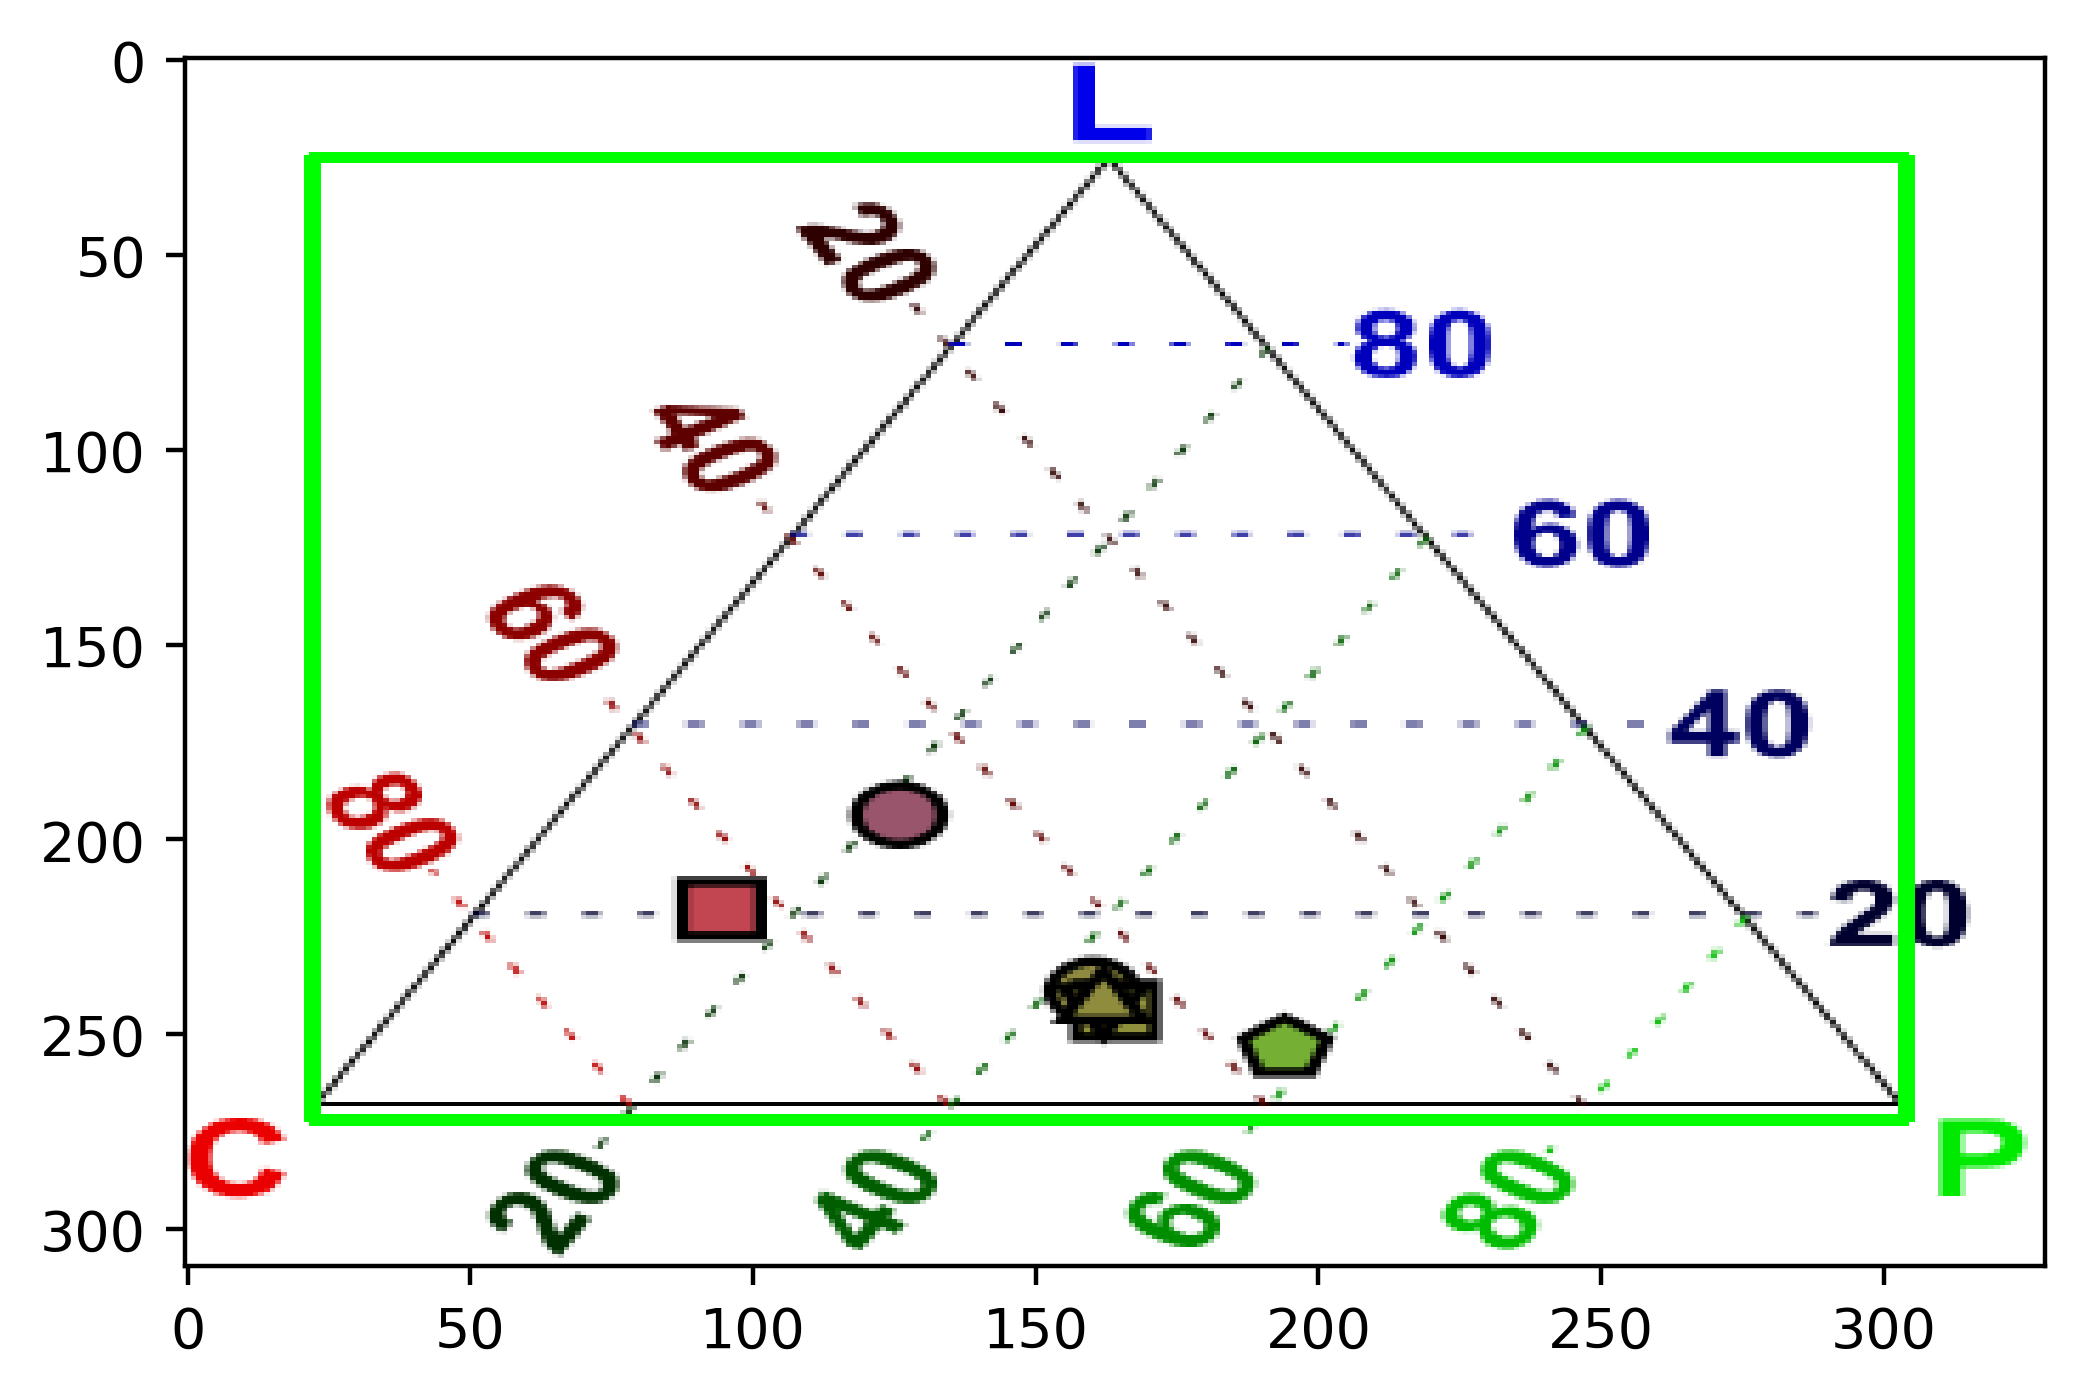

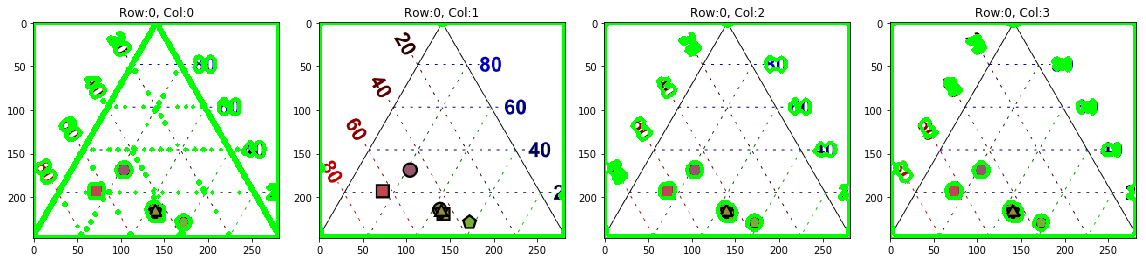

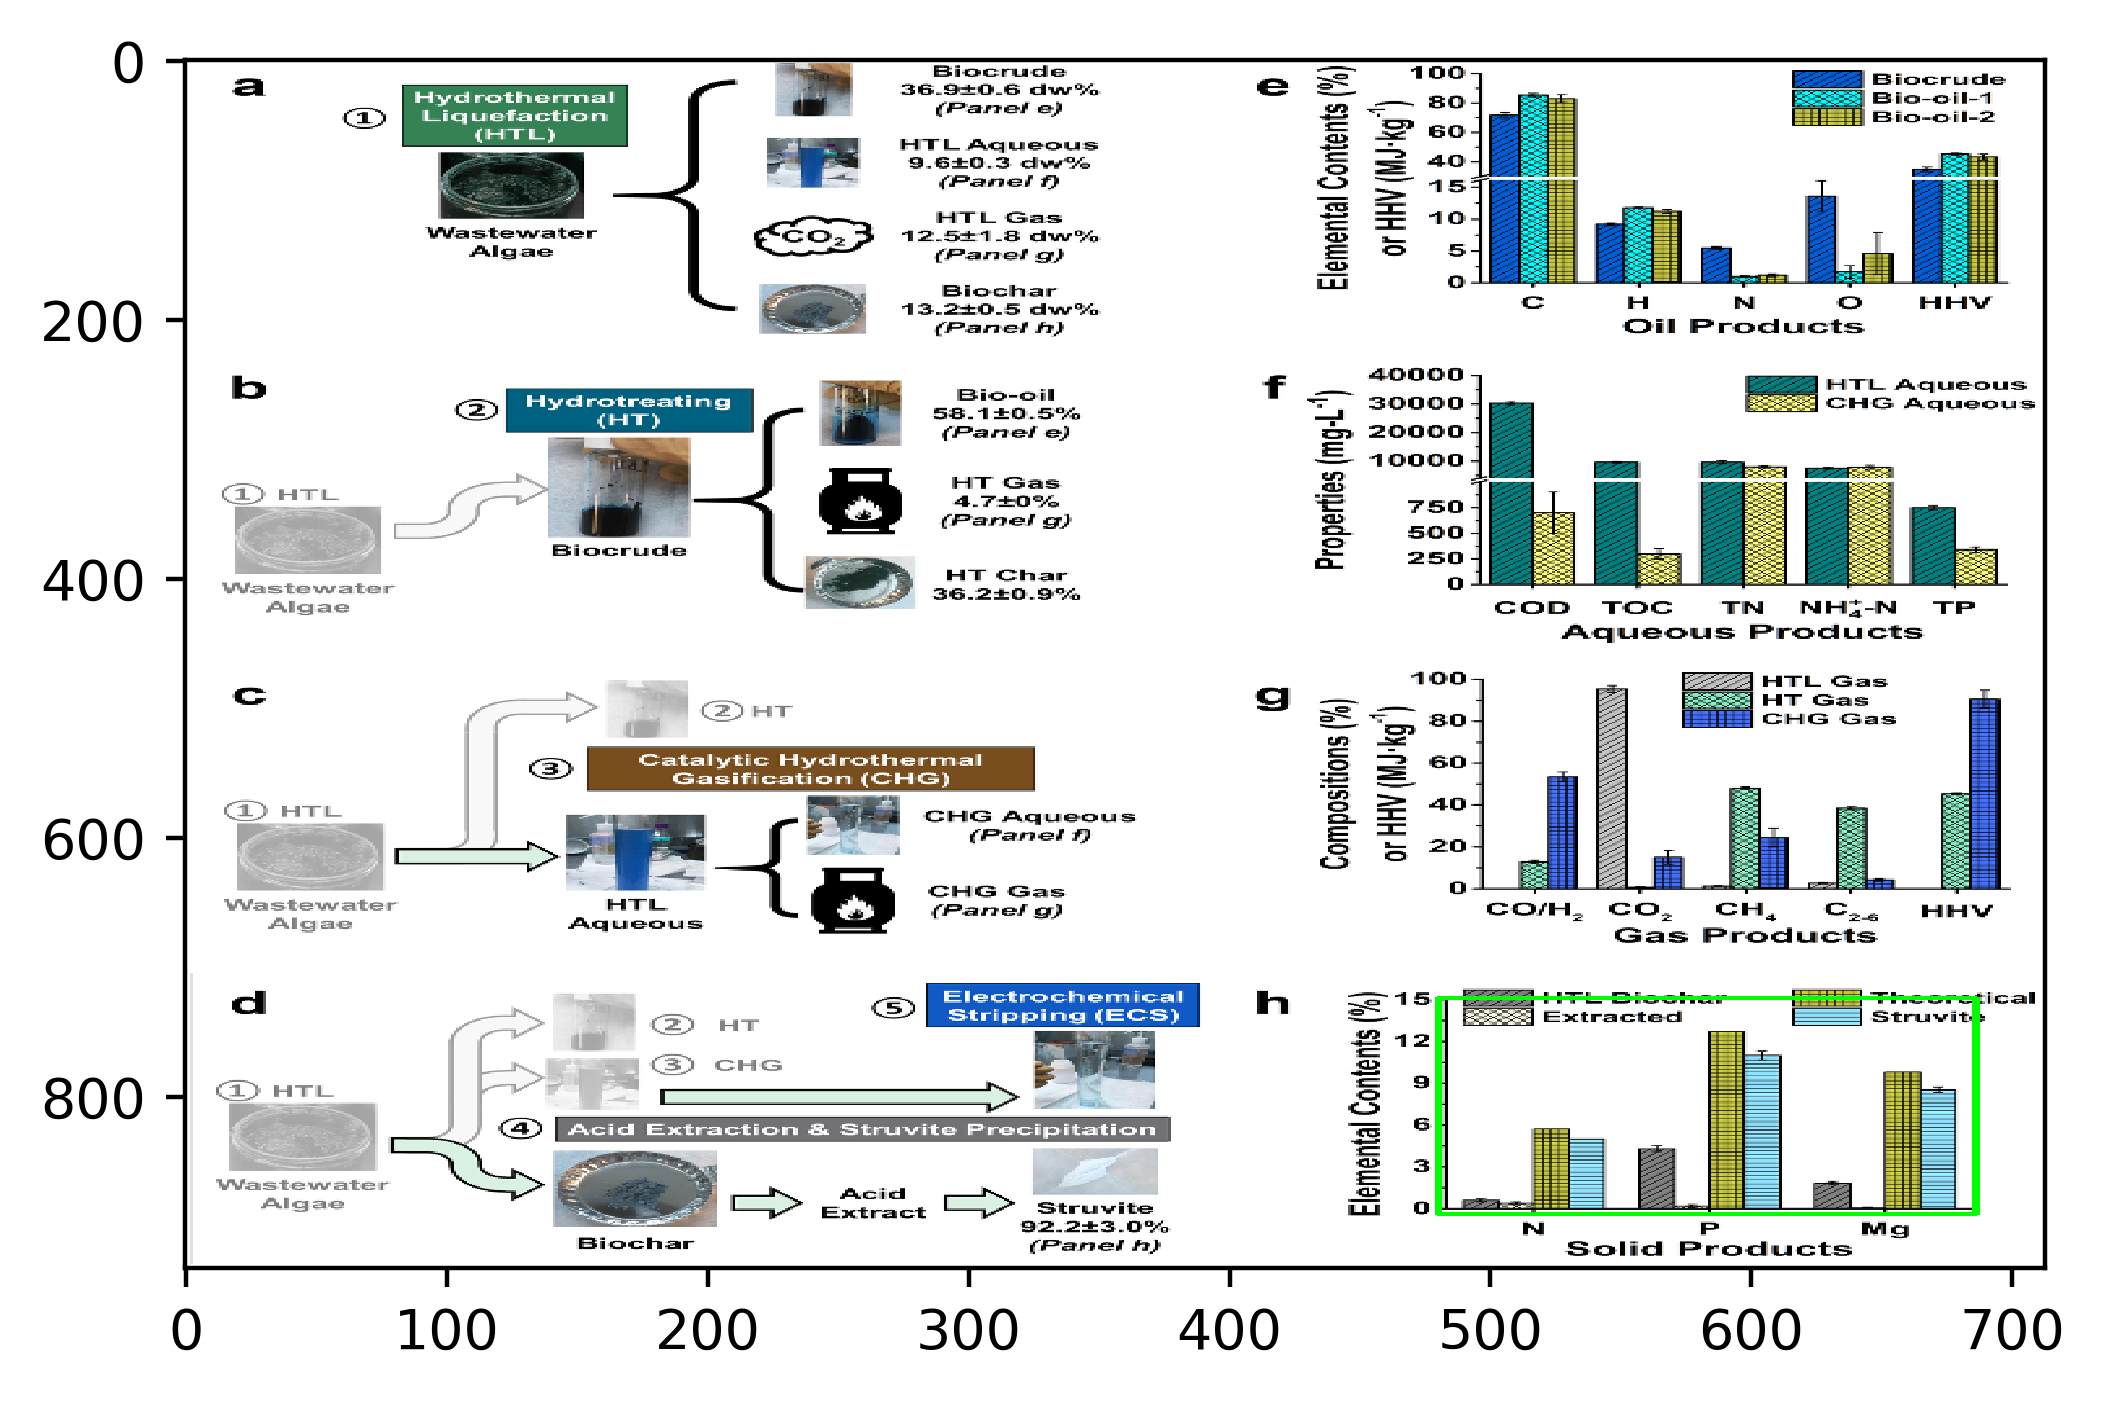

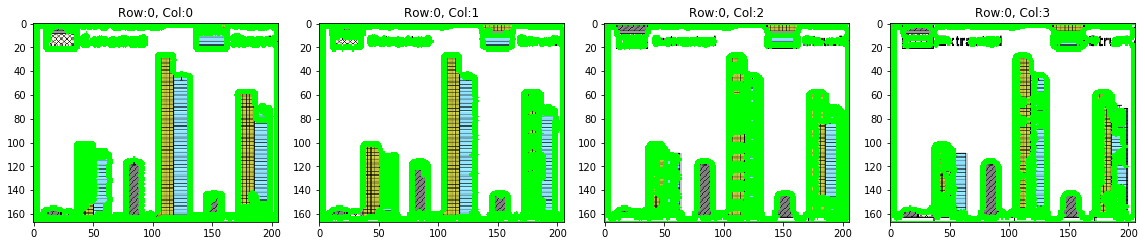

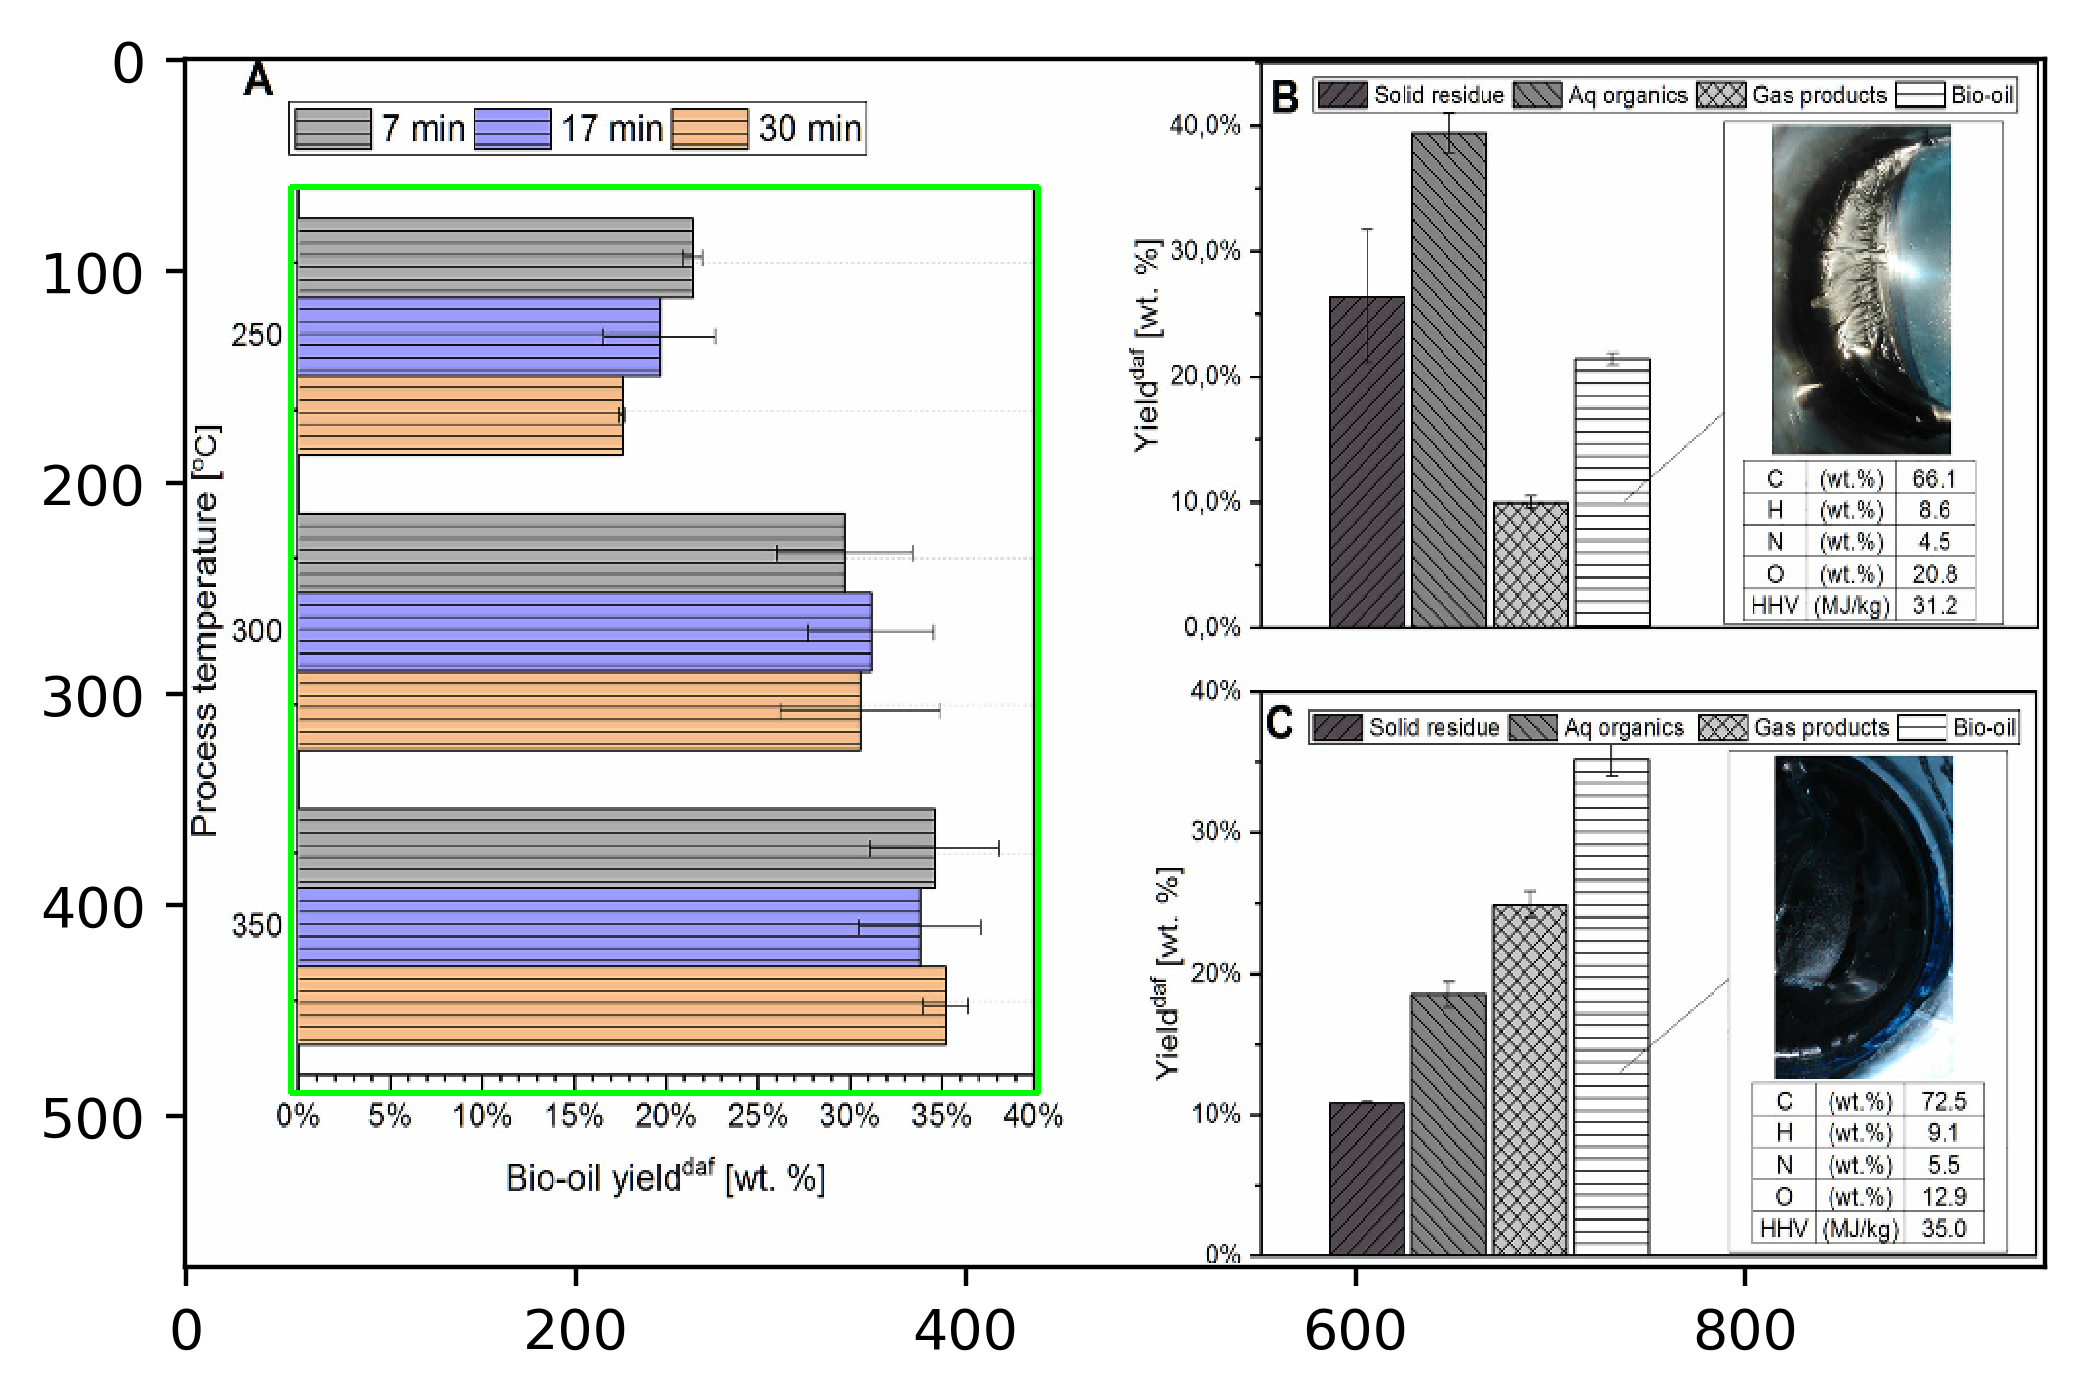

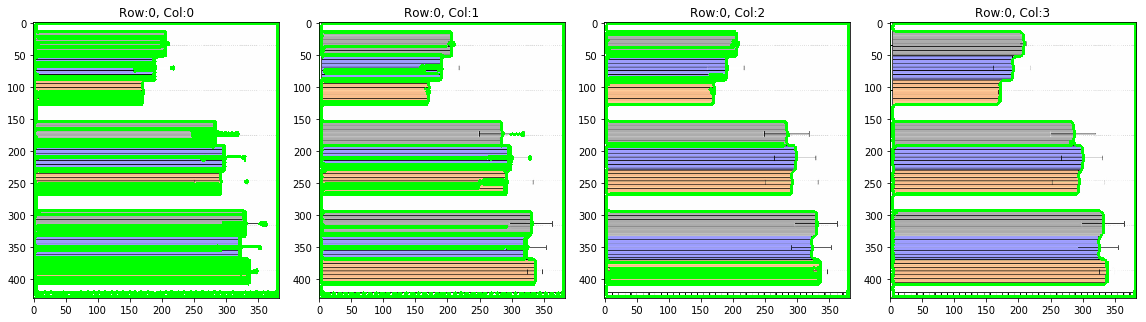

In [ ]:
for image in image_data:
    if image in os.listdir(img_dir):
        
        img = cv2.imread(img_dir + '/' + image)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        edged = cv2.Canny(gray, 0, 250)
        contours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        rects = [cv2.boundingRect(cnt) for cnt in contours]
        rects = sorted(rects, key=lambda x:x[2] * x[3], reverse=True)
        x, y, w, h = rects[0]
        
        cv2.rectangle(img, (x,y), (x + w, y + h), (0, 255, 0), 2)
        plt.figure(dpi = 400)
        plt.imshow(img, aspect='auto')
        plt.show()

        nrows, ncols = 1, 4
        figsize = [16, 16]
        kernelsize = [3, 5, 7, 9]

        fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

        for i, axi in enumerate(ax.flat):
            crop_img = img[y:y + h, x:x + w].copy()
            gray = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)

            # Median filter to remove noise
            gray = cv2.medianBlur(gray, kernelsize[i])

            edged = cv2.Canny(gray, 0, 250)

            contours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            cv2.drawContours(crop_img, contours, -1, (0, 255, 0), 3)
            axi.imshow(crop_img)

            # get indices of row/column
            rowid = i // ncols
            colid = i % ncols

            # write row/col indices as axes' title for identification
            axi.set_title("Row:" + str(rowid) + ", Col:" + str(colid))

        plt.tight_layout(True)
        plt.show()